Digite o número de pontos: 3
Digite o x1: 5
Digite o y1: 8
Digite o x2: 7
Digite o y2: 3
Digite o x3: -15
Digite o y3: 8
[ 0.         -0.17045455  0.        ]
Valores calculados:
x: [5.0, 7.0, -15.0]
y: [8.0, 3.0, 8.0]
h: [2.0, -22.0]
c: [ 0.         -0.17045455  0.        ]
b: [-2.38636364 -2.72727273]
d: [-0.02840909 -0.00258264]


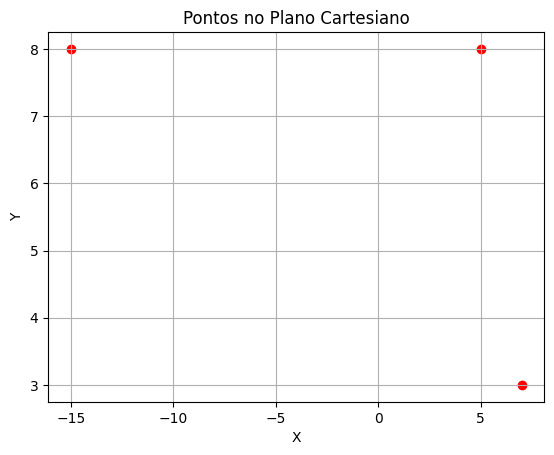

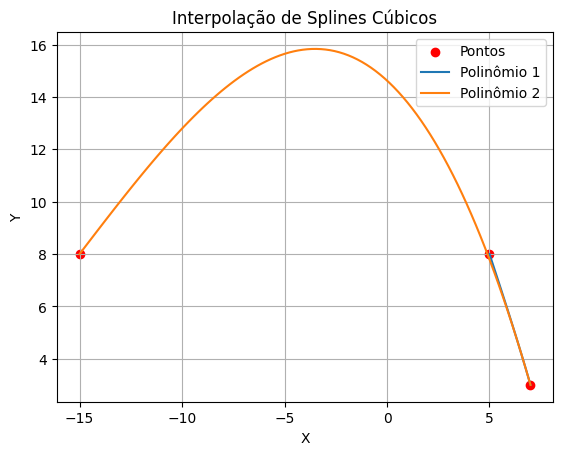

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Solicitar ao usuário os pontos
num_pontos = int(input("Digite o número de pontos: "))
x = []
yx = []
for i in range(num_pontos):
    ponto_x = float(input(f"Digite o x{i+1}: "))
    ponto_y = float(input(f"Digite o y{i+1}: "))
    x.append(ponto_x)
    yx.append(ponto_y)

# Cálculo dos intervalos h
h = [x[i] - x[i - 1] for i in range(1, len(x))]

# Cálculo dos coeficientes
A = np.zeros((len(x), len(x)))
b = np.zeros(len(x))

A[0, 0] = 1
A[-1, -1] = 1

for i in range(1, len(x)-1):
    A[i, i-1] = h[i-1]
    A[i, i] = 2 * (h[i-1] + h[i])
    A[i, i+1] = h[i]
    b[i] = 3 * ((yx[i+1] - yx[i]) / h[i] - (yx[i] - yx[i-1]) / h[i-1])


c = np.linalg.solve(A, b)
print(c)

# Cálculo do vetor B
b = np.zeros(len(x)-1)
for i in range(len(x)-1):
    b[i] = (yx[i+1] - yx[i]) / h[i] - (2 * c[i] + c[i+1]) * h[i] / 3

# Cálculo do vetor D
d = np.zeros(len(x)-1)
for i in range(len(x)-1):
    d[i] = (c[i+1] - c[i]) / (3 * h[i])

# Imprimir todos os valores
print("Valores calculados:")
print("x:", x)
print("y:", yx)
print("h:", h)
print("c:", c)
print("b:", b)
print("d:", d)

# Plotagem dos pontos
plt.scatter(x, yx, color='red', label='Pontos')

# Exibição dos pontos antes de plotar as funções
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pontos no Plano Cartesiano')
plt.grid(True)
plt.show()

# Plotagem dos polinômios interpoladores cúbicos
plt.scatter(x, yx, color='red', label='Pontos')
for i in range(len(x)-1):
    x_intervalo = np.linspace(x[i], x[i+1], 100)  # Criando valores de x no intervalo
    p = np.poly1d([d[i], c[i], b[i], yx[i]])  # Criando o polinômio
    y_intervalo = p(x_intervalo - x[i])  # Ajustando o x para cada intervalo
    plt.plot(x_intervalo, y_intervalo, label=f'Polinômio {i+1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interpolação de Splines Cúbicos')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


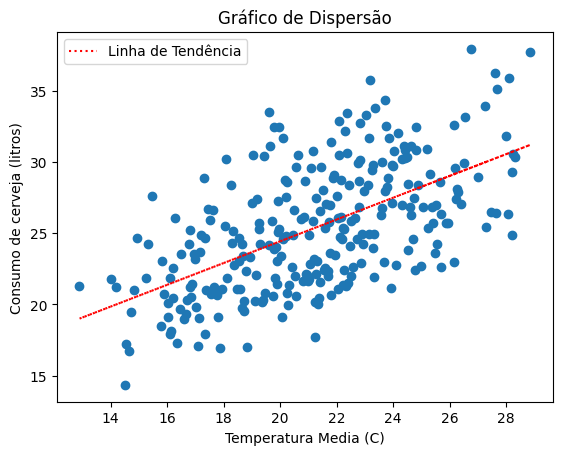

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset
df = pd.read_csv('/content/drive/MyDrive/Consumo_cerveja.csv', decimal=',', dtype={'Temperatura Media (C)': 'float'})

# Escolher as colunas
x = 'Temperatura Media (C)'
y = 'Consumo de cerveja (litros)'

# Remover linhas com valores NaN nas colunas específicas
df = df.dropna(subset=[x, y])

#Remove Duplicatas
df = df.drop_duplicates(subset=x, keep='first')
for i in df.columns :
    df[i] = pd.to_numeric(df[i], errors='coerce')
# Plotar o gráfico de dispersão
plt.scatter(df[x], df[y])


# Calcular a linha de tendência
coeficientes = np.polyfit(df[x], df[y], 1)
polinomio = np.poly1d(coeficientes)
linha_tendencia = polinomio(df[x])
plt.plot(df[x], linha_tendencia, color='red', linestyle='dotted', label='Linha de Tendência')

# Adicionar títulos e rótulos
plt.title('Gráfico de Dispersão')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()


# Mostrar o gráfico
plt.show()


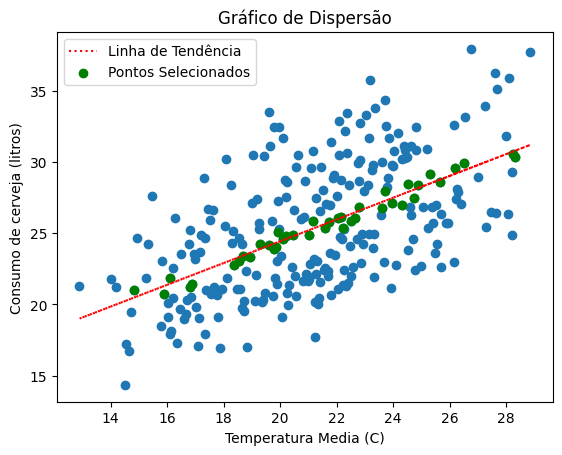

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset
df = pd.read_csv('/content/drive/MyDrive/Consumo_cerveja.csv', decimal=',', dtype={'Temperatura Media (C)': 'float'})

# Escolher as colunas
x = 'Temperatura Media (C)'
y = 'Consumo de cerveja (litros)'

# Remover linhas com valores NaN nas colunas específicas
df = df.dropna(subset=[x, y])

#Remove Duplicatas
df = df.drop_duplicates(subset=x, keep='first')
for i in df.columns :
    df[i] = pd.to_numeric(df[i], errors='coerce')
# Plotar o gráfico de dispersão
plt.scatter(df[x], df[y])


# Calcular a linha de tendência
coeficientes = np.polyfit(df[x], df[y], 1)
polinomio = np.poly1d(coeficientes)
linha_tendencia = polinomio(df[x])
plt.plot(df[x], linha_tendencia, color='red', linestyle='dotted', label='Linha de Tendência')

# Calcular as distâncias entre os pontos e a linha de tendência
distancias = np.abs(df[y] - linha_tendencia)

num_pontos_selecionados = 40
indices_pontos_perto = distancias.argsort()[:num_pontos_selecionados]
pontos_perto = df.iloc[indices_pontos_perto]
plt.scatter(pontos_perto[x], pontos_perto[y], color='green', label='Pontos Selecionados')

# Adicionar títulos e rótulos
plt.title('Gráfico de Dispersão')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()


# Mostrar o gráfico
plt.show()


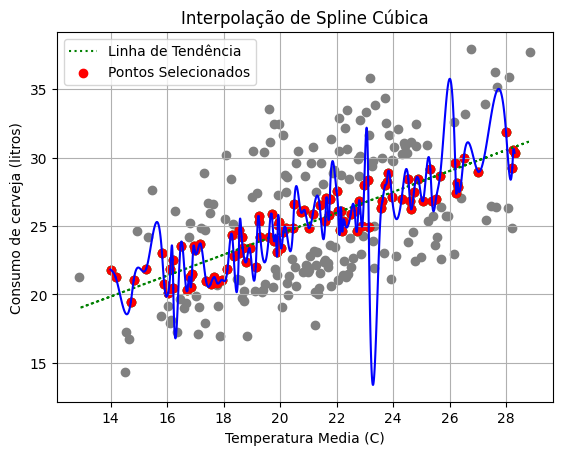

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset
df = pd.read_csv('/content/drive/MyDrive/Consumo_cerveja.csv', decimal=',', dtype={'Temperatura Media (C)': 'float'})

# Escolher as colunas
x_col = 'Temperatura Media (C)'
y_col = 'Consumo de cerveja (litros)'

# Remover linhas com valores NaN nas colunas específicas
df = df.dropna(subset=[x_col, y_col])

# Remove Duplicatas
df = df.drop_duplicates(subset=x_col, keep='first')
for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors='coerce')

# Plotar o gráfico de dispersão
plt.scatter(df[x_col], df[y_col], color='gray')

# Calcular a linha de tendência
coeficientes = np.polyfit(df[x_col], df[y_col], 1)
polinomio = np.poly1d(coeficientes)
linha_tendencia = polinomio(df[x_col])
plt.plot(df[x_col], linha_tendencia, color='green', linestyle='dotted', label='Linha de Tendência')

# Calcular as distâncias entre os pontos e a linha de tendência
distancias = np.abs(df[y_col] - linha_tendencia)

num_pontos_selecionados = 100
indices_pontos_perto = distancias.argsort()[:num_pontos_selecionados]
pontos_perto = df.iloc[indices_pontos_perto].drop_duplicates(subset=x_col).head(num_pontos_selecionados)
plt.scatter(pontos_perto[x_col], pontos_perto[y_col], color='green')

# Ordenar os pontos selecionados por x
pontos_perto = pontos_perto.sort_values(by=x_col)

# Encontrar nós uniformemente espaçados ao longo do eixo x
x = pontos_perto[x_col].tolist()
yx = pontos_perto[y_col].tolist()

# Cálculo dos intervalos h
h = [x[i] - x[i - 1] for i in range(1, len(x))]

# Ajuste do número de pontos para a matriz A e vetor b
num_pontos = len(x)
A = np.zeros((num_pontos, num_pontos))
b = np.zeros(num_pontos)

A[0, 0] = 1
A[-1, -1] = 1

for i in range(1, num_pontos - 1):
    A[i, i - 1] = h[i - 1]
    A[i, i] = 2 * (h[i - 1] + h[i])
    A[i, i + 1] = h[i]
    b[i] = 3 * ((yx[i + 1] - yx[i]) / h[i] - (yx[i] - yx[i - 1]) / h[i - 1])

#Método da eliminação de Gauss
def eliminacao_gauss(A, b):
    n = len(b)
    for i in range(n):
        # Pivotamento parcial
        max_row = np.argmax(np.abs(A[i:n, i])) + i
        A[[i, max_row]] = A[[max_row, i]]
        b[[i, max_row]] = b[[max_row, i]]

        # Eliminação para tornar a matriz A triangular superior
        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]

    # Solução do sistema triangular superior
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]

    return x

# Resolvendo o sistema linear para obter os coeficientes c
#c = np.linalg.solve(A, b)
c = eliminacao_gauss(A,b)
# Cálculo do vetor B
b = np.zeros(num_pontos - 1)
for i in range(num_pontos - 1):
    b[i] = (yx[i + 1] - yx[i]) / h[i] - (2 * c[i] + c[i + 1]) * h[i] / 3

# Cálculo do vetor D
d = np.zeros(num_pontos - 1)
for i in range(num_pontos - 1):
    d[i] = (c[i + 1] - c[i]) / (3 * h[i])

# Plotagem dos pontos
plt.scatter(x, yx, color='red', label='Pontos Selecionados')

# Cálculo e plotagem da spline cúbica
for i in range(num_pontos - 1):
    x_intervalo = np.linspace(x[i], x[i + 1], 100)  # Criando valores de x no intervalo
    y_intervalo = (yx[i] +
                   b[i] * (x_intervalo - x[i]) +
                   c[i] * (x_intervalo - x[i])**2 +
                   d[i] * (x_intervalo - x[i])**3)
    plt.plot(x_intervalo, y_intervalo, color='blue')

plt.xlabel('Temperatura Media (C)')
plt.ylabel('Consumo de cerveja (litros)')
plt.title('Interpolação de Spline Cúbica')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# Carregar o dataset
df = pd.read_csv('/content/drive/MyDrive/Consumo_cerveja.csv', decimal=',', dtype={'Temperatura Media (C)': 'float'})

# Escolher as colunas
x_col = 'Temperatura Media (C)'
y_col = 'Consumo de cerveja (litros)'

# Remover linhas com valores NaN nas colunas específicas
df = df.dropna(subset=[x_col, y_col])

# Remove Duplicatas
df = df.drop_duplicates(subset=x_col, keep='first')
for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors='coerce')

# Plotar o gráfico de dispersão
plt.scatter(df[x_col], df[y_col], color='gray')

# Calcular a linha de tendência
coeficientes = np.polyfit(df[x_col], df[y_col], 1)
polinomio = np.poly1d(coeficientes)
linha_tendencia = polinomio(df[x_col])
plt.plot(df[x_col], linha_tendencia, color='grey', linestyle='dotted', label='Linha de Tendência')

# Calcular as distâncias entre os pontos e a linha de tendência
distancias = np.abs(df[y_col] - linha_tendencia)

num_pontos_selecionados = 80
indices_pontos_perto = distancias.argsort()[:num_pontos_selecionados]
pontos_perto = df.iloc[indices_pontos_perto].drop_duplicates(subset=x_col).head(num_pontos_selecionados)
plt.scatter(pontos_perto[x_col], pontos_perto[y_col], color='green', label='Pontos Selecionados')

# Ordenar os pontos selecionados por x
pontos_perto = pontos_perto.sort_values(by=x_col)

# Garantir que x e yx sejam listas ordenadas
x = pontos_perto[x_col].tolist()
yx = pontos_perto[y_col].tolist()

# Ajustar a spline cúbica usando SciPy
cs = CubicSpline(x, yx)

# Criar pontos x para a plotagem da spline
x_new = np.linspace(min(x), max(x), 500)
y_new = cs(x_new)

# Plotar a spline cúbica
plt.plot(x_new, y_new, color='blue', label='Spline Cúbica')

# Ajustar os rótulos e título do gráfico
plt.xlabel('Temperatura Media (C)')
plt.ylabel('Consumo de cerveja (litros)')
plt.title('Interpolação de Spline Cúbica')
plt.grid(True)
plt.legend()
plt.show()
